### Import package

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from skmultilearn.problem_transform import BinaryRelevance,ClassifierChain, LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import LancasterStemmer
from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.adapt import BRkNNaClassifier,BRkNNbClassifier
from sklearn.multioutput import RegressorChain
from mlxtend.classifier import StackingClassifier
import joblib
import ipyparallel as ipp

### Import dataset

In [2]:
filpkart_watch=pd.read_csv('flipkart_watch.csv')
filpkart_tablet=pd.read_csv('flipkart_tablet.csv')
filpkart_laptop=pd.read_csv('flipkart_laptop.csv')
filpkart_phone=pd.read_csv('flipkart_phone.csv')
filpkart_TV=pd.read_csv('flipkart_TV.csv')
amazon_watch=pd.read_csv('amazon_watch.csv')
amazon_tablet=pd.read_csv('amazon_power_bank.csv')
amazon_earphone=pd.read_csv('amazon_earphone.csv')
amazon_phone=pd.read_csv('amazon_phone.csv')
amazon_TV=pd.read_csv('amazon_TV.csv')
dataa = pd.concat([filpkart_watch,filpkart_tablet,filpkart_laptop,filpkart_TV,filpkart_phone,
                  amazon_watch,amazon_tablet,amazon_earphone,amazon_TV,amazon_phone], axis=0)
dataa

,comments,rating
0,Terrific purchase,5
1,Highly recommended,5
2,Just wow!,5
3,Worth every penny,5
4,Must buy!,5
...,...,...
12495,Selfie camera is very poor,1
12496,Review after 1 month,1
12497,Charger USB cable not working,1
12498,Disoppointed with product quality,1


In [3]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comments  124984 non-null  object
 1   rating    125000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [4]:
dataa[dataa['comments'].isna()]

,comments,rating
4997,NaN,4
5187,NaN,3
11516,NaN,1
2257,NaN,5
4035,NaN,4
5197,NaN,3
6165,NaN,3
7024,NaN,3
10720,NaN,1
3087,NaN,4


In [5]:
data=dataa[dataa['comments'].notna()].reset_index(drop=True)
data

,comments,rating
0,Terrific purchase,5
1,Highly recommended,5
2,Just wow!,5
3,Worth every penny,5
4,Must buy!,5
...,...,...
124979,Selfie camera is very poor,1
124980,Review after 1 month,1
124981,Charger USB cable not working,1
124982,Disoppointed with product quality,1


### Data Pre-processing

In [6]:
def remove_least(df,rating):
    dato=df[df['rating']==rating].reset_index(drop=True)
    listy=[]
    for i in dato['comments']:     ###combine all words
        listy.extend(i.split())
    dic = {}
    for raw_word in listy:         ### bag of words
        word = raw_word.lower()
        if word in dic:
            dic[word] += 1
        else:
            dic[word] = 1
    filtery= dict((k, v) for k, v in dic.items() if v < 20) ### filter
    for i in range(len(dato)):
        dato['comments'].iloc[i]=' '.join([j for j in dato['comments'].iloc[i].split() if j not in filtery])
    return dato

In [7]:
def preprocess_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([wnl.lemmatize(word) for word in elem.split()]))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([word for word in elem.split() if len(word)>2 if word not in (stop)]))
    return df

In [8]:
wnl = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
stop.remove('not')
stop.append('product')
data=preprocess_text(data,'comments')
data

,comments,rating
0,terrific purchase,5
1,highly recommended,5
2,wow,5
3,worth every penny,5
4,must buy,5
...,...,...
124979,selfie camera poor,1
124980,review month,1
124981,charger usb cable not working,1
124982,disoppointed quality,1


In [9]:
data=pd.concat([remove_least(data,1),remove_least(data,2),remove_least(data,3),remove_least(data,4),remove_least(data,5)],
               axis=0)
data

,comments,rating
0,waste money,1
1,poor,1
2,terrible,1
3,not recommended,1
4,terrible,1
...,...,...
24993,good quality,5
24994,smooth experience,5
24995,awesome,5
24996,thanks samsung,5


### EDA

In [10]:
print('Dataset contains '+str(data.shape[0])+' rows & '+str(data.shape[1])+' columns')

Dataset contains 124984 rows & 2 columns


<AxesSubplot:xlabel='comments'>

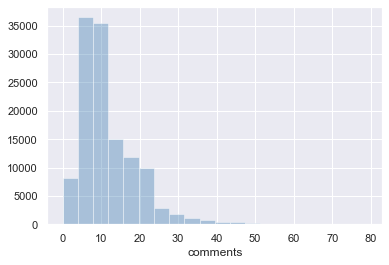

In [11]:
sn.set(color_codes=True)
comment_len = data.comments.str.len()
sn.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [12]:
print('Datapoints of 5 rating:',data[data['rating']==5].shape[0])
print('Datapoints of 4 rating:',data[data['rating']==4].shape[0])
print('Datapoints of 3 rating:',data[data['rating']==3].shape[0])
print('Datapoints of 2 rating:',data[data['rating']==2].shape[0])
print('Datapoints of 1 rating:',data[data['rating']==1].shape[0])

Datapoints of 5 rating: 24998
Datapoints of 4 rating: 24997
Datapoints of 3 rating: 24993
Datapoints of 2 rating: 24999
Datapoints of 1 rating: 24997


### Visualizing most frequent words w.r.t each labels

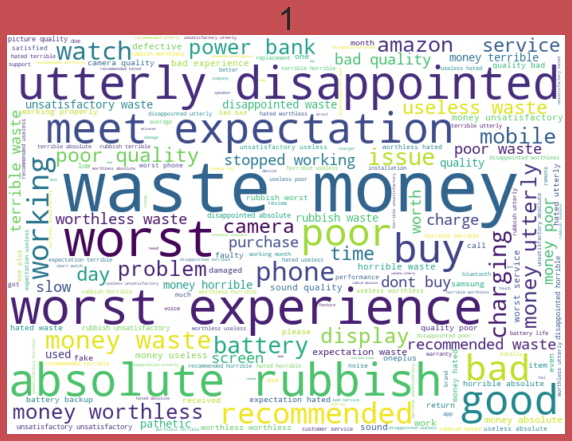

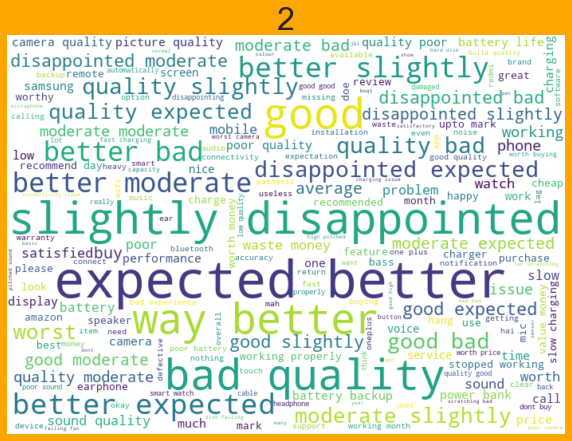

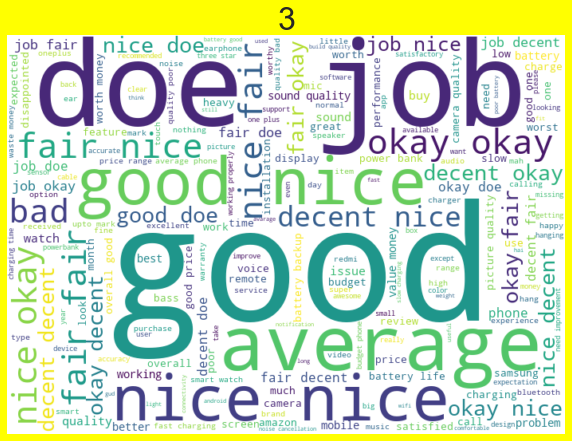

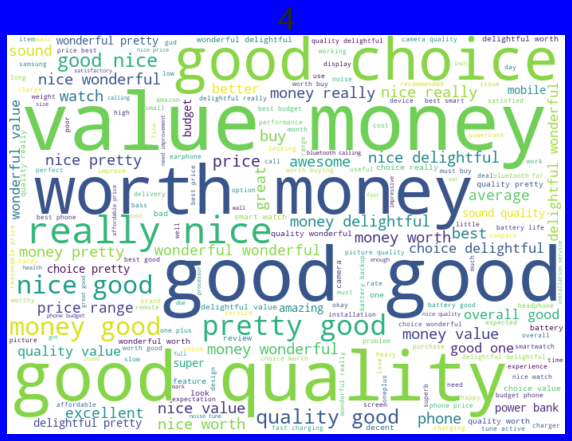

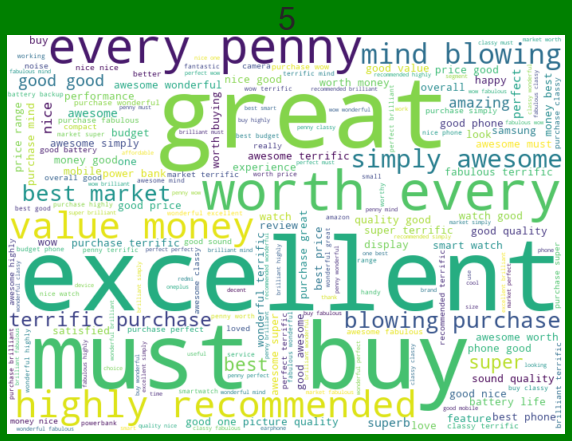

In [13]:
plt.figure(figsize = (10,8),facecolor='r')
dat=data['comments'][data['rating']==1]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(1, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='orange')
dat=data['comments'][data['rating']==2]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(2, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='yellow')
dat=data['comments'][data['rating']==3]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(3, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='blue')
dat=data['comments'][data['rating']==4]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(4, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='green')
dat=data['comments'][data['rating']==5]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(5, fontsize = 32)
plt.axis("off")
plt.show()

### Data transformation

##### Encoding strings to numbers

In [15]:
tf_vec = TfidfVectorizer(max_features = 1000, stop_words='english')
tf_vec.fit(data['comments'])
x= tf_vec.transform(data['comments'])
y=data.drop(['comments'],axis=1)

#### Spilting data

In [16]:
iter_model=[]
model_scores=[]
model_ham=[]
model_roc=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20)

### Best random state

In [17]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(43,100,2):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20)
        model.fit(x_train,y_train)
        tmp=accuracy_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum accuracy_score is at random state :",random," and it is :",score)

### Model Building & Evaluation

In [18]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),
        RidgeClassifier(),BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),LGBMClassifier(),XGBClassifier(),
        ExtraTreesClassifier(),AdaBoostClassifier(),CalibratedClassifierCV(),LinearSVC(),RidgeClassifierCV()]

In [19]:
for i in models:
    scores=cross_val_score(i,x_train,y_train,cv=5,n_jobs=-1)
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print('score',score)
    print('Acc score',accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*'*10)
    model_scores.append(accuracy_score(y_test,y_pred))
    model_ham.append(score)
    iter_model.append(str(i))

LogisticRegression()
score 0.6586056875428004
Acc score 0.6592791134936192
[[3801  531  377  174  127]
 [ 588 2946  680  748  118]
 [ 240  493 3089  998  189]
 [ 109  170  887 3309  503]
 [  42   85  451 1007 3335]]
**********
DecisionTreeClassifier()
score 0.6618260980971329
Acc score 0.6645997519702365
[[3828  476  484   95  127]
 [ 551 3121 1134  145  129]
 [ 307  453 3834  239  176]
 [ 116  215 1576 2563  508]
 [  54  157  760  682 3267]]
**********
KNeighborsClassifier()
score 0.6355327331502966
Acc score 0.6355562667520103
[[3741  894  245   90   40]
 [ 685 3736  418  147   94]
 [ 387 1442 2802  259  119]
 [ 174 1123  696 2525  460]
 [ 257  629  305  646 3083]]
**********
RandomForestClassifier()
score 0.6673467996897205
Acc score 0.6714805776693203
[[3850  455  488   87  130]
 [ 530 3097 1162  149  142]
 [ 263  435 3886  245  180]
 [ 110  190 1547 2594  537]
 [  43  131  738  650 3358]]
**********
SVC()
score 0.6699671547391775
Acc score 0.6710805296635596
[[3871  476  475   77 

In [22]:
models.sort_values(by=['Scores'],ascending=False)

,Model,Scores,Hamming loss
16,Stack Classifier,0.671961,0.657486
11,ExtraTreesClassifier(),0.671961,0.668337
3,RandomForestClassifier(),0.671481,0.667347
4,SVC(),0.671081,0.669967
6,BaggingClassifier(),0.667400,0.663246
1,DecisionTreeClassifier(),0.664600,0.661826
10,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.662279,0.661976
9,LGBMClassifier(),0.661279,0.661126
0,LogisticRegression(),0.659279,0.658606
14,LinearSVC(),0.657039,0.658276


ExtraTreesClassifier is th best model as stacking the models is not making enough difference in accuracy.

### Hyperparameter Tuning

In [31]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[2,8,16,32,50],'class_weight':['balanced', 'balanced_subsample']}
clf = RandomizedSearchCV(ExtraTreesClassifier(), parameters, cv=5,scoring="roc_auc",n_jobs=-1, verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_features': 'sqrt',
 'max_depth': 32,
 'criterion': 'gini',
 'class_weight': 'balanced'}

### Best Random State w.r.t Best performing Model

In [32]:
besttrain(ExtraTreesClassifier(max_depth=32,criterion='gini',max_features='sqrt',class_weight='balanced'),x,y)

maximum accuracy_score is at random state : 73  and it is : 0.6425571068528223


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 73,test_size=0.20)
classmodel=ExtraTreesClassifier(max_depth=32,criterion='gini',max_features='sqrt',class_weight='balanced')
classmodel.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=32, max_features='sqrt')

In [41]:
y_acc=classmodel.predict(x_train)
print('Train accuracy',accuracy_score(y_train,y_acc))
y_pred=classmodel.predict(x_test)
print('Test accuracy',accuracy_score(y_test,y_pred))
y_pred=classmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(classmodel,x_train,y_train,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
if accuracy_score(y_test,y_pred)>score:
    diff=accuracy_score(y_test,y_pred)-score
    print('accuracy bigger')
else:
    diff=score-accuracy_score(y_test,y_pred)
print('diff',diff)
std=np.std(scores)
print('std:',std)

Train accuracy 0.6557552481822637
Test accuracy 0.6434772172660719
Confusion matrix 
 [[4019  153   27  136  702]
 [ 749 2395  111  693  953]
 [ 440  154 2360  938  976]
 [ 129   65  461 3314 1061]
 [  56   49  136  923 3997]]
classification report 
               precision    recall  f1-score   support

           1       0.75      0.80      0.77      5037
           2       0.85      0.49      0.62      4901
           3       0.76      0.48      0.59      4868
           4       0.55      0.66      0.60      5030
           5       0.52      0.77      0.62      5161

    accuracy                           0.64     24997
   macro avg       0.69      0.64      0.64     24997
weighted avg       0.68      0.64      0.64     24997



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


cross_val_score: 0.6311520160367289
accuracy bigger
diff 0.012325201229342997
std: 0.002618881457316295


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.4s finished


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 73,test_size=0.20)
finalmodel=ExtraTreesClassifier()
finalmodel.fit(x_train,y_train)
y_acc=finalmodel.predict(x_train)
print('Train accuracy',accuracy_score(y_train,y_acc))
y_pred=finalmodel.predict(x_test)
print('Test accuracy',accuracy_score(y_test,y_pred))
y_pred=classmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(finalmodel,x_train,y_train,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
if accuracy_score(y_test,y_pred)>score:
    diff=accuracy_score(y_test,y_pred)-score
    print('accuracy bigger')
else:
    diff=score-accuracy_score(y_test,y_pred)
print('diff',diff)
std=np.std(scores)
print('std:',std)

Train accuracy 0.7335653634972547
Test accuracy 0.6781613793655239
Confusion matrix 
 [[4019  153   27  136  702]
 [ 749 2395  111  693  953]
 [ 440  154 2360  938  976]
 [ 129   65  461 3314 1061]
 [  56   49  136  923 3997]]
classification report 
               precision    recall  f1-score   support

           1       0.75      0.80      0.77      5037
           2       0.85      0.49      0.62      4901
           3       0.76      0.48      0.59      4868
           4       0.55      0.66      0.60      5030
           5       0.52      0.77      0.62      5161

    accuracy                           0.64     24997
   macro avg       0.69      0.64      0.64     24997
weighted avg       0.68      0.64      0.64     24997



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


cross_val_score: 0.6654565081451886
diff 0.021979290879116764
std: 0.001250640988611414


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


#### Saving the model

In [47]:
joblib.dump(finalmodel,"Ratings_Pred.pkl")

['Ratings_Pred.pkl']